In [1]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data_clean.csv")
print(data)

     Unnamed: 0  Ozone  Solar.R  Wind Temp C Month  Day  Year  Temp Weather
0             1   41.0    190.0   7.4     67     5    1  2010    67       S
1             2   36.0    118.0   8.0     72     5    2  2010    72       C
2             3   12.0    149.0  12.6     74     5    3  2010    74      PS
3             4   18.0    313.0  11.5     62     5    4  2010    62       S
4             5    NaN      NaN  14.3     56     5    5  2010    56       S
..          ...    ...      ...   ...    ...   ...  ...   ...   ...     ...
153         154   41.0    190.0   7.4     67     5    1  2010    67       C
154         155   30.0    193.0   6.9     70     9   26  2010    70      PS
155         156    NaN    145.0  13.2     77     9   27  2010    77       S
156         157   14.0    191.0  14.3     75     9   28  2010    75       S
157         158   18.0    131.0   8.0     76     9   29  2010    76       C

[158 rows x 10 columns]


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [4]:
# data.types
data.dtypes

Unnamed: 0      int64
Ozone         float64
Solar.R       float64
Wind          float64
Temp C         object
Month          object
Day             int64
Year            int64
Temp            int64
Weather        object
dtype: object

In [5]:
# Drop dupplicate coilumn and Unnamed column
data1 = data.drop(['Unnamed: 0',"Temp C"],axis =1)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2010,67,C
154,30.0,193.0,6.9,9,26,2010,70,PS
155,NaN,145.0,13.2,9,27,2010,77,S
156,14.0,191.0,14.3,9,28,2010,75,S


In [6]:
# convert the Month column data type to integer data type
data1['Month']=pd.to_numeric(data['Month'],errors='coerce')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    157 non-null    float64
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 10.0+ KB


In [7]:
# Checking for duplicated rows in the table
#Print the duplicated rows
data1[data1.duplicated()]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
156,14.0,191.0,14.3,9.0,28,2010,75,S


In [8]:
# Print all duplicated rows
data1[data1.duplicated(keep = False)]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
150,14.0,191.0,14.3,9.0,28,2010,75,S
156,14.0,191.0,14.3,9.0,28,2010,75,S


In [9]:
# Impute missing values (Replace NaN with mean/median, mode etc.) using fillna()
median_solar = data1["Solar"].median()
mean_solar = data1["Solar"].mean()
print("Median of Solar:",median_solar)
print("Mean of Solar:",mean_solar)

KeyError: 'Solar'

In [ ]:
# Find the mode values of categorical column (weather)
print(data1["Weather"].value_counts())
mode_weather = data1["Weather"].mode()[0]
print(mode_weather)

In [ ]:
#Impute missing values (Replace NaN with mode etc.) of "weather" using fillna()
data1["Weather"] = data1["Weather"].fillna(mode_weather)
data1.isnull().sum()

In [ ]:
# Find the mode values of categorical column (month)
print(data1["Month"].value_counts())
mode_Month = data1["Month"].mode()[0]
print(mode_Month)

In [ ]:
#Impute missing values (Replace NaN with mode etc.) of "month" using fillna()
data1["Month"] = data1["Month"].fillna(mode_weather)
data1.isnull().sum()

In [ ]:
# Reset the index column
data1.reset_index(drop=True)

# Detection of outliers in the columns


In [ ]:
Method1:Using histograms and box plots
#Create a figure with two subplots, stacked vertices
fig,axes = plt.subplots)2,1,figsize =(8,6),grid

# Observations
- The ozone column has extreme values beyound 81 as seen from box plot
- The same is confirmed from the below right_skewed histogram

# Method 2 for outlier detection
* Using mu +/-3*sigma limits (Standard deviation method)
  

In [ ]:
data1["Ozone"].describe()

In [ ]:
mu = data1["Ozone"].describe()[1]
sigma = data1["Ozone"].describe()[2]

for x in data1["Ozone"]:
    if ((x < (mu - 3*sigma)) or (x > (mu +3*sigma))):
        print(x)

# Quantile-Quantile plot for detection of outliers

In [ ]:
import scipy.stats as stats

#Create Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(data1["Ozone"], dist="norm", plot=plt)
plt.title("Q-Q Plot for Outlier Detection", fontsize=14)
plt.xlabel("Theoretical Quantiles", fontsize=12)

In [ ]:
sns.violinplot(data=data1["Ozone"],color='lightgreen')
plt.title("violin plot")
plt.show()

In [ ]:
sns.swarmplot(data=data1, x = "Weather", y = "Ozone",color="orange",palette="Set2", size=6)

In [ ]:
sns.stripplot(data=data1, x = "Weather", y = "Ozone", palette="Set1", size=6, jitter = True)

<Axes: xlabel='Ozone', ylabel='Density'>

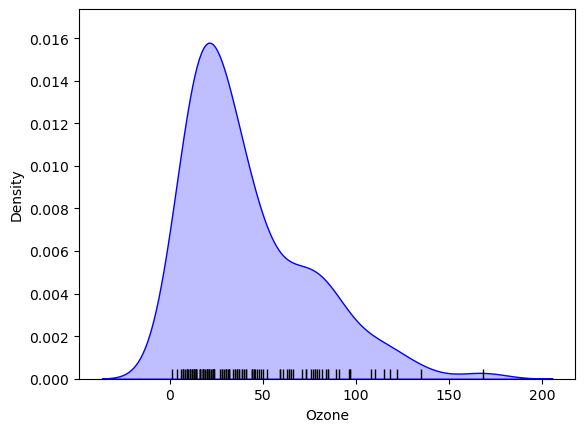

In [10]:
sns.kdeplot(data=data1["Ozone"],  fill=True, color="blue")
sns.rugplot(data=data1["Ozone"], color="black")

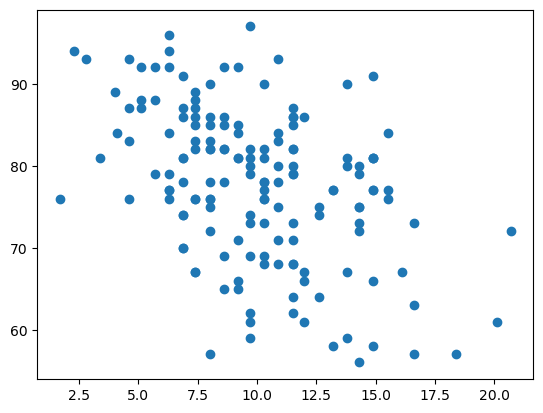

In [11]:
plt.scatter(data1["Wind"], data1["Temp"])

In [13]:
# Compute pearson correlation coefficient 
#between WInd speed and Temperature
data1["Wind"].corr(data1["Temp"])

-0.441246717631239

# Observation
* The correlation between wind and temp is observed to be negatively correlated with mild strength

In [14]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    157 non-null    float64
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 10.0+ KB


In [16]:
# Read all numeric (continuous) columns into a new table data1_numeric
data1_numeric  = data1.iloc[:,[0,1,2,6]]
data1_numeric

,Ozone,Solar.R,Wind,Temp
0,41.0,190.0,7.4,67
1,36.0,118.0,8.0,72
2,12.0,149.0,12.6,74
3,18.0,313.0,11.5,62
4,NaN,NaN,14.3,56
...,...,...,...,...
153,41.0,190.0,7.4,67
154,30.0,193.0,6.9,70
155,NaN,145.0,13.2,77
156,14.0,191.0,14.3,75


In [17]:
# print correlation coefficients for all the above columns
data1_numeric.corr()

,Ozone,Solar.R,Wind,Temp
Ozone,1.000000,0.348642,-0.593530,0.694098
Solar.R,0.348642,1.000000,-0.056594,0.273322
Wind,-0.593530,-0.056594,1.000000,-0.441247
Temp,0.694098,0.273322,-0.441247,1.000000


# Observations
* The highest correlation strength is observed between Ozone and Temperature(0.597087)
* The next higher correlation strength is observed between Ozone and wind(-0.523738)
* The next higther correlation stength is observed between wind and temp(-0.441228)
* The least correlation strength is observed between solar and wind(-0.055874)

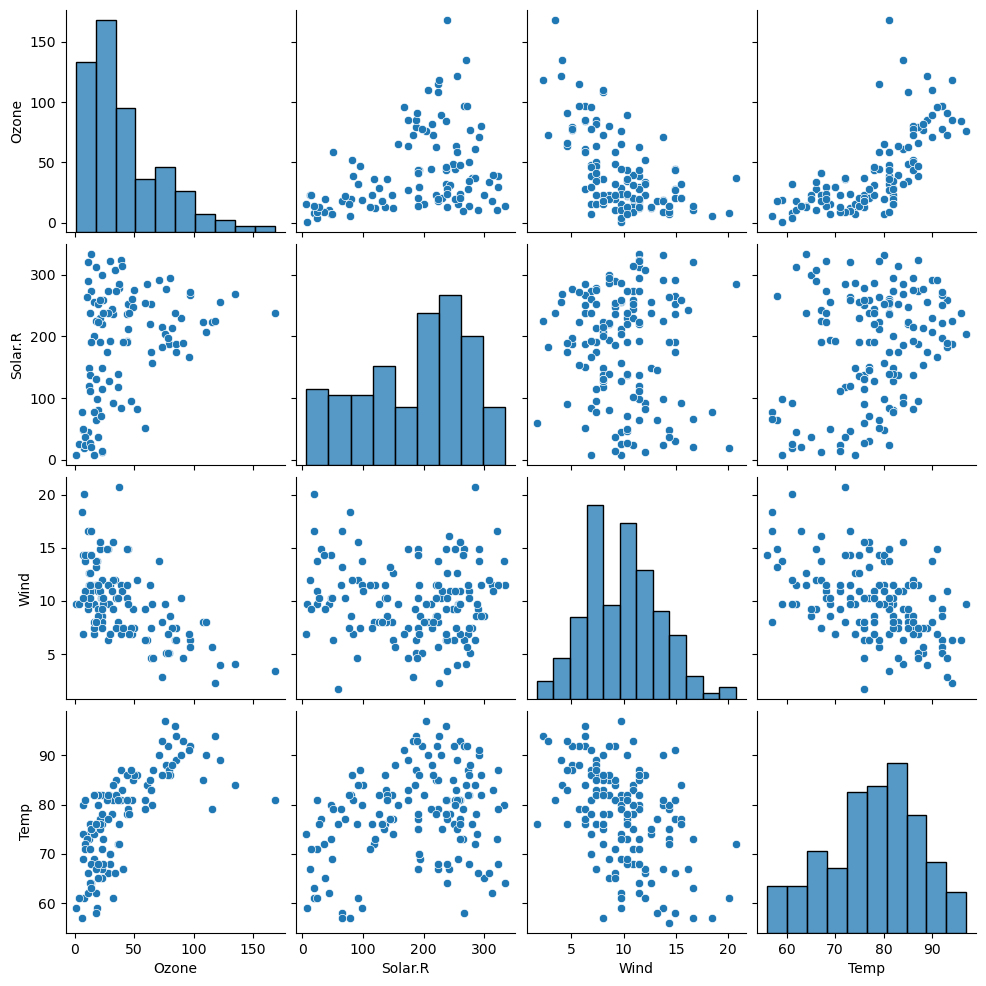

In [18]:
# Plot a pair plot between all numeric columns using seaborn
sns.pairplot(data1_numeric)

# Transformations

In [19]:
# Creating dummy variable for weather column
data2=pd.get_dummies(data1,columns=['Month','Weather'])
data2

,Ozone,Solar.R,Wind,Day,Year,Temp,Month_5.0,Month_6.0,Month_7.0,Month_8.0,Month_9.0,Weather_C,Weather_PS,Weather_S
0,41.0,190.0,7.4,1,2010,67,True,False,False,False,False,False,False,True
1,36.0,118.0,8.0,2,2010,72,True,False,False,False,False,True,False,False
2,12.0,149.0,12.6,3,2010,74,True,False,False,False,False,False,True,False
3,18.0,313.0,11.5,4,2010,62,True,False,False,False,False,False,False,True
4,NaN,NaN,14.3,5,2010,56,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,1,2010,67,True,False,False,False,False,True,False,False
154,30.0,193.0,6.9,26,2010,70,False,False,False,False,True,False,True,False
155,NaN,145.0,13.2,27,2010,77,False,False,False,False,True,False,False,True
156,14.0,191.0,14.3,28,2010,75,False,False,False,False,True,False,False,True


In [23]:
# Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

array = data1_numeric.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaled = scaler.fit_transform(array)

#transformed data
set_printoptions(precision=2)
print(rescaled[0:10,:])

[[0.24 0.56 0.3  0.27]
 [0.21 0.34 0.33 0.39]
 [0.07 0.43 0.57 0.44]
 [0.1  0.94 0.52 0.15]
 [ nan  nan 0.66 0.  ]
 [0.16  nan 0.69 0.24]
 [0.13 0.89 0.36 0.22]
 [0.11 0.28 0.64 0.07]
 [0.04 0.04 0.97 0.12]
 [ nan 0.57 0.36 0.32]]
